In [1]:
import numpy as np
import pandas as pd

In [2]:
#获得特征矩阵和标签矩阵
def get_Mat(path):
    dataSet = pd.read_table(path,header = None)
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    return xMat,yMat

In [3]:
xMat,yMat = get_Mat('simpdata.txt')

In [4]:
xMat

matrix([[1. , 2.1],
        [1.5, 1.6],
        [1.3, 1. ],
        [1. , 1. ],
        [2. , 1. ]])

In [5]:
yMat

matrix([[ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]])

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['simhei']#显示中文
%matplotlib inline

In [9]:
#数据集可视化函数
def showPlot(xMat,yMat):
    x=np.array(xMat[:,0])
    y=np.array(xMat[:,1])
    label = np.array(yMat)
    plt.scatter(x,y,c=label)
    plt.title('单层决策树测试数据')
    plt.show()

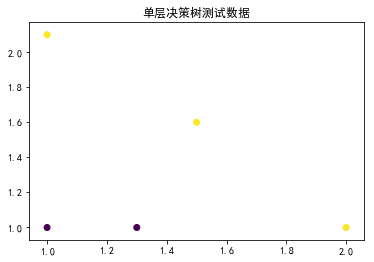

In [10]:
showPlot(xMat,yMat)

In [7]:
xMat[:,0]

matrix([[1. ],
        [1.5],
        [1.3],
        [1. ],
        [2. ]])

In [8]:
xMat[:,1]

matrix([[2.1],
        [1.6],
        [1. ],
        [1. ],
        [1. ]])

In [12]:
def Classify0(xMat,i,Q,S):
    re = np.ones((xMat.shape[0],1))                       #初始化re为1
    if S == 'lt':
        re[xMat[:,i] <= Q] = -1                           #如果小于阈值,则赋值为-1
    else:
        re[xMat[:,i] > Q] = -1                            #如果大于阈值,则赋值为-1
    return re

In [11]:
np.ones((xMat.shape[0],1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [18]:
def get_Stump(xMat,yMat,D):
    m,n = xMat.shape                                #m为样本个数，n为特征数             
    Steps = 10                                      #初始化一个步数
    bestStump = {}                                  #用字典形式来储存树桩信息
    bestClas = np.mat(np.zeros((m,1)))              #初始化分类结果为1
    minE = np.inf                                   #最小误差初始化为正无穷大
    for i in range(n):                              #遍历所有特征
        Min = xMat[:,i].min()                       #找到特征中最小值
        Max = xMat[:,i].max()                       #找到特征中最大值
        stepSize = (Max - Min) / Steps              #计算步长
        for j in range(-1, int(Steps)+1):                                     
            for S in ['lt', 'gt']:                  #大于和小于的情况，均遍历。lt:less than，gt:greater than
                Q = (Min + j * stepSize)            #计算阈值
                re = Classify0(xMat, i, Q, S)       #计算分类结果
                err = np.mat(np.ones((m,1)))        #初始化误差矩阵
                err[re == yMat] = 0                 #分类正确的,赋值为0
                eca = D.T * err                     #计算误差
                #print(f'切分特征: {i}, 阈值:{np.round(Q,2)}, 标志:{S}, 权重误差:{np.round(eca,3)}')
                if eca < minE:                      #找到误差最小的分类方式
                    minE = eca
                    bestClas = re.copy()
                    bestStump['特征列'] = i
                    bestStump['阈值'] = Q
                    bestStump['标志'] = S
    return bestStump,minE,bestClas

In [19]:
m=xMat.shape[0]
D = np.mat(np.ones((m, 1)) / m)  #初始化样本权重（每个样本权重相等）
get_Stump(xMat,yMat,D)

({'特征列': 0, '阈值': 1.3, '标志': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [25]:
def Ada_train(xMat, yMat, maxC = 40):
    weakClass = []
    m = xMat.shape[0]
    D = np.mat(np.ones((m, 1)) / m)                         #初始化权重
    aggClass = np.mat(np.zeros((m,1)))
    for i in range(maxC):                           
        Stump, error, bestClas = get_Stump(xMat, yMat,D)    #构建单层决策树
        #print(f"D:{D.T}")
        alpha=float(0.5 * np.log((1 - error) / max(error, 1e-16))) #计算弱分类器权重alpha
        Stump['alpha'] = np.round(alpha,2)                  #存储弱学习算法权重,保留两位小数
        weakClass.append(Stump)                             #存储单层决策树
        #print("bestClas: ", bestClas.T)
        expon = np.multiply(-1 * alpha *yMat, bestClas)     #计算e的指数项
        D = np.multiply(D, np.exp(expon))                                      
        D = D / D.sum()                                     #根据样本权重公式，更新样本权重
        aggClass += alpha * bestClas                        #更新累计类别估计值
        #print(f"aggClass: {aggClass.T}" )
        aggErr = np.multiply(np.sign(aggClass) != yMat, np.ones((m,1)))#计算误差
        errRate = aggErr.sum() / m
        #print(f"分类错误率: {errRate}")
        if errRate == 0: break                               #误差为0，退出循环
    return weakClass, aggClass

In [26]:
Ada_train(xMat, yMat, maxC = 40)

([{'特征列': 0, '阈值': 1.3, '标志': 'lt', 'alpha': 0.69},
  {'特征列': 1, '阈值': 1.0, '标志': 'lt', 'alpha': 0.97},
  {'特征列': 0, '阈值': 0.9, '标志': 'lt', 'alpha': 0.9}],
 matrix([[ 1.17568763],
         [ 2.56198199],
         [-0.77022252],
         [-0.77022252],
         [ 0.61607184]]))

In [27]:
yMat

matrix([[ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]])

In [20]:
m = xMat.shape[0]
m

5

In [23]:
max(-1, 1e-16)

1e-16

In [31]:
weakClass, aggClass = Ada_train(xMat, yMat, maxC = 40)

In [40]:
def AdaClassify(data,weakClass):
    dataMat = np.mat(data)
    m = dataMat.shape[0]
    aggClass = np.mat(np.zeros((m,1)))
    for i in range(len(weakClass)):        #遍历所有分类器，进行分类
        classEst = Classify0(dataMat, 
                             weakClass[i]['特征列'], 
                             weakClass[i]['阈值'], 
                             weakClass[i]['标志'])            
        aggClass += weakClass[i]['alpha'] * classEst
        #print(aggClass)
    return np.sign(aggClass)

In [33]:
data=[0,0]

In [34]:
AdaClassify(data,weakClass)

matrix([[-1.]])

In [35]:
data=xMat

In [36]:
aggClass

matrix([[ 1.17568763],
        [ 2.56198199],
        [-0.77022252],
        [-0.77022252],
        [ 0.61607184]])

In [41]:
AdaClassify(data,weakClass)

matrix([[ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]])

In [42]:
yMat

matrix([[ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]])

In [43]:
train = pd.read_table('horseColicTraining2.txt',header=None)
test = pd.read_table('horseColicTest2.txt',header=None)

In [45]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,0.0,2.0,5.0,...,0.0,0.0,0.0,3.0,5.0,45.0,8.4,0.0,0.0,-1.0
1,1.0,1.0,39.2,88.0,20.0,0.0,0.0,4.0,1.0,3.0,...,0.0,0.0,0.0,4.0,2.0,50.0,85.0,2.0,2.0,-1.0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,0.0,0.0,0.0,1.0,1.0,33.0,6.7,0.0,0.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,1.0,2.0,5.0,3.0,0.0,48.0,7.2,3.0,5.3,-1.0
4,2.0,1.0,37.3,104.0,35.0,0.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74.0,7.4,0.0,0.0,-1.0


In [46]:
train.shape

(299, 22)

In [47]:
test.shape

(67, 22)

In [48]:
def calAcc(maxC = 40):
    train_xMat,train_yMat = get_Mat('horseColicTraining2.txt')
    m=train_xMat.shape[0]
    weakClass, aggClass =Ada_train(train_xMat, train_yMat, maxC)
    yhat = AdaClassify(train_xMat,weakClass)
    train_re=0
    for i in range(m):
        if yhat[i]==train_yMat[i]:
            train_re+=1
    train_acc= train_re/m
    print(f'训练集准确率为{train_acc}')
    
    test_re=0
    test_xMat,test_yMat=get_Mat('horseColicTest2.txt')
    n=test_xMat.shape[0]
    yhat = AdaClassify(test_xMat,weakClass)
    for i in range(n):
        if yhat[i]==test_yMat[i]:
            test_re+=1
    test_acc=test_re/n
    print(f'测试集准确率为{test_acc}')
    return train_acc,test_acc

In [49]:
calAcc(maxC = 40)

训练集准确率为0.802675585284281
测试集准确率为0.8059701492537313


(0.802675585284281, 0.8059701492537313)

In [50]:
Cycles=[1,10,50,100,500,1000,10000]
train_acc=[]
test_acc=[]
for maxC in Cycles:
    a,b=calAcc(maxC)
    train_acc.append(round(a*100,2))
    test_acc.append(round(b*100,2))
df=pd.DataFrame({'分类器数目':Cycles,
                 '训练集准确率':train_acc,
                 '测试集准确率':test_acc})
df

训练集准确率为0.7157190635451505
测试集准确率为0.7313432835820896
训练集准确率为0.7658862876254181
测试集准确率为0.7611940298507462
训练集准确率为0.8093645484949833
测试集准确率为0.7910447761194029
训练集准确率为0.8093645484949833
测试集准确率为0.7761194029850746
训练集准确率为0.8394648829431438
测试集准确率为0.746268656716418
训练集准确率为0.8595317725752508
测试集准确率为0.7313432835820896
训练集准确率为0.8963210702341137
测试集准确率为0.6716417910447762


,分类器数目,训练集准确率,测试集准确率
0,1,71.57,73.13
1,10,76.59,76.12
2,50,80.94,79.10
3,100,80.94,77.61
4,500,83.95,74.63
5,1000,85.95,73.13
6,10000,89.63,67.16


In [66]:
def plotROC(xMat,yMat,maxC):
    cur=(1.0,1.0)                                        #初始化x,y起点
    ySum = 0                                             #初始化累积高度       
    weakClass, aggClass =Ada_train(xMat, yMat, maxC)
    P = sum(yMat==1)                                     #正样本个数
    yStep = 1 / float(P)                                 #y轴步长   
    xStep = 1 / float(len(yMat) - P)                     #x轴步长
    index = aggClass.T.argsort().tolist()[0]             #预测强度排序,返回的是索引
    #绘制ROC曲线
    plt.figure()
    ax = plt.subplot(111)
    for i in index:
        if yMat[i] == 1.0:
            delX = 0
            delY = yStep
        else:
            delX = xStep
            delY = 0
            ySum += cur[1]                                                 #高度累加
        ax.plot([cur[0], cur[0] - delX], [cur[1], cur[1] - delY], c = 'b') #绘制ROC
        cur = (cur[0] - delX, cur[1] - delY)                           #更新绘制光标的位置
    ax.plot([0,1], [0,1], 'r--')
    plt.title('AdaBoost病马数据集的ROC曲线',size=18)
    plt.xlabel('1-特异度',size=15)
    plt.ylabel('敏感度',size=15)
    ax.axis([0, 1, 0, 1])
    plt.show()

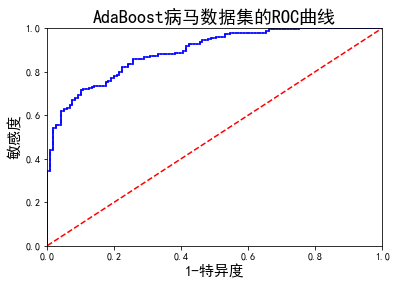

In [67]:
plotROC(xMat,yMat,maxC=40)

In [52]:
xMat,yMat = get_Mat('horseColicTraining2.txt')

In [54]:
xMat.shape

(299, 21)

In [56]:
len(yMat)

299

In [58]:
sum(yMat==1)

matrix([[178]])

In [59]:
weakClass, aggClass =Ada_train(xMat, yMat, 40)

In [62]:
len(aggClass)

299

In [68]:
#aggClass.T.argsort().tolist()[0]

In [69]:
#weakClass

In [75]:
def calAUC(xMat,yMat,maxC):
    cur=(1.0,1.0)
    ySum = 0        
    weakClass, aggClass =Ada_train(xMat, yMat, maxC)
    P = sum(yMat==1)                                     #正样本个数
    yStep = 1 / float(P)                                 #y轴步长   
    xStep = 1 / float(len(yMat) - P)                     #x轴步长
    index = aggClass.T.argsort().tolist()[0]             #预测强度排序,返回的是索引
    for i in index:
        if yMat[i] == 1.0:
            delX = 0
            delY = yStep
        else:
            delX = xStep
            delY = 0
            ySum += cur[1]                              #高度累加
        cur = (cur[0] - delX, cur[1] - delY)            #更新绘制光标的位置
    AUC= ySum * xStep
    print(f'AUC面积为:{round(AUC,3)}')
    return AUC

In [76]:
calAUC(xMat,yMat,maxC=10)

AUC面积为:0.858


0.8582969635063604

In [73]:
np.arange(10,150,10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])

AUC面积为:0.858
AUC面积为:0.874
AUC面积为:0.886
AUC面积为:0.892
AUC面积为:0.895
AUC面积为:0.898
AUC面积为:0.901
AUC面积为:0.903
AUC面积为:0.904
AUC面积为:0.907
AUC面积为:0.909
AUC面积为:0.91
AUC面积为:0.912
AUC面积为:0.913


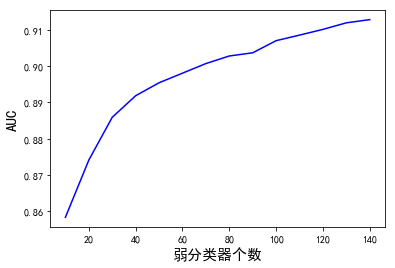

In [77]:
AUC=[]
for i in np.arange(10,150,10):
    auc= calAUC(xMat,yMat,i)
    AUC.append(auc)
plt.plot(np.arange(10,150,10),AUC,c='b')
plt.xlabel('弱分类器个数',size=15)
plt.ylabel('AUC',size=15)
plt.show()

In [78]:
#导入数据集
import pandas as pd
data = pd.read_csv('Taitanic_data/data.csv')

In [80]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
#data['PassengerId'].value_counts()

In [83]:
data.shape

(891, 12)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [85]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
#删除缺失值多，目测对建模没用的列
data.drop(['PassengerId','Name','Cabin','Ticket'],inplace=True,axis=1) 

In [87]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [88]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [89]:
data["Age"].mean()

29.699117647058763

In [90]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [91]:
data = data.dropna()

In [92]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [93]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [96]:
#将二分类变量转换为数值型变量
data['Sex']=(data['Sex']=='male').astype('int')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
#data.loc[:,'Sex'] = (data['Sex']=='male').astype('int')
#(data['Sex']=='male').astype('int')

In [99]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [101]:
data['Embarked'].unique()

array([0, 1, 2], dtype=int64)

In [100]:
#将三分类变量转换为数值型变量
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [103]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [104]:
#提取特征矩阵和标签矩阵
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

In [106]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [108]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [109]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.25)

In [111]:
Xtrain.shape

(666, 7)

In [112]:
len(Ytrain)

666

In [113]:
len(Ytest)

223

In [114]:
#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [116]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,66.000000,0,0,10.50,0
1,3,0,29.699118,0,2,7.75,2
2,3,1,24.000000,2,0,24.15,0
3,3,1,40.000000,1,1,15.50,2
4,3,1,19.000000,0,0,8.05,0


In [117]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [118]:
#带入模型粗跑一下
ada = AdaBoostClassifier(random_state=25)
ada = ada.fit(Xtrain, Ytrain)
score_ada = ada.score(Xtest, Ytest)
score_ada

0.8071748878923767

In [119]:
#交叉验证
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada, Xtrain, Ytrain, cv=5)
print(f'这个模型的准确率为{round(scores.mean() * 100,2)}%(+/- {round(scores.std()*2 *100,2)}%)')

这个模型的准确率为79.87%(+/- 6.03%)


In [120]:
#随机森林
rfc = RandomForestClassifier(random_state=25)
rfc = rfc.fit(Xtrain, Ytrain)
score_rfc = rfc.score(Xtest, Ytest)
score_rfc

0.820627802690583

In [121]:
#梯度提升
gbc = GradientBoostingClassifier(random_state=25)
gbc = gbc.fit(Xtrain, Ytrain)
score_gbc = gbc.score(Xtest, Ytest)
score_gbc

0.8161434977578476

In [123]:
#AdaBoost与随机森林结合
model = AdaBoostClassifier(RandomForestClassifier(n_estimators = 1000),
                           algorithm="SAMME",
                           n_estimators=500)
model = model.fit(Xtrain, Ytrain)
score_AdaRfc = model.score(Xtest, Ytest)
score_AdaRfc

0.8295964125560538